In [1]:
import pandas as pd
import numpy as np
#Librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

#Estrategias de balanceo: subsampling
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter



In [3]:
# Configuración warnings
import warnings
warnings.filterwarnings('once')

## Leer dataset

In [4]:
path = "/content/stroke_dataset.csv"
df = pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df["work_type"].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [7]:
for col in ["work_type", "Residence_type", "smoking_status"]:
    print(f"Valores en '{col}':")
    for i in df[col].unique():
        print("\t"+str(i))
    print()

Valores en 'work_type':
	Private
	Self-employed
	Govt_job
	children

Valores en 'Residence_type':
	Urban
	Rural

Valores en 'smoking_status':
	formerly smoked
	never smoked
	smokes
	Unknown



In [8]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

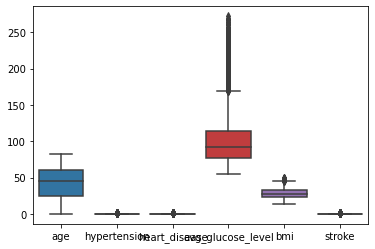

In [9]:
sns.boxplot(data=df)

In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [11]:
X = df.drop("stroke", axis = 1)
y = df["stroke"]

In [12]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [14]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
numericas = ["age", "avg_glucose_level", "bmi"]
binarias = ["hypertension", "heart_disease"]

Label Encoder

Using LabelEncoder to transform categorical variables into continuous variables.

In [15]:
'''
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
label_encoder_ever_married = LabelEncoder()
label_encoder_work_type = LabelEncoder()
label_encoder_Residence_type = LabelEncoder()
label_encoder_smoking_status = LabelEncoder()


X[:,0] = label_encoder_gender.fit_transform(X[:,0])
X[:,4] = label_encoder_ever_married.fit_transform(X[:,4])
X[:,5] = label_encoder_work_type.fit_transform(X[:,5])
X[:,6] = label_encoder_Residence_type.fit_transform(X[:,6])
X[:,9] = label_encoder_smoking_status.fit_transform(X[:,9])
'''

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoder_gender = LabelEncoder()\nlabel_encoder_ever_married = LabelEncoder()\nlabel_encoder_work_type = LabelEncoder()\nlabel_encoder_Residence_type = LabelEncoder()\nlabel_encoder_smoking_status = LabelEncoder()\n\n\nX[:,0] = label_encoder_gender.fit_transform(X[:,0])\nX[:,4] = label_encoder_ever_married.fit_transform(X[:,4])\nX[:,5] = label_encoder_work_type.fit_transform(X[:,5])\nX[:,6] = label_encoder_Residence_type.fit_transform(X[:,6])\nX[:,9] = label_encoder_smoking_status.fit_transform(X[:,9])\n'

### **We will run the models before scaling the data, after we will back here to run the StandardScaler and MinMax Scaler and verify if we have best results using the scaling.**

In [16]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [18]:
X = transformer.fit_transform(X)

In [19]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_Female,transformer_categorico__gender_Male,transformer_categorico__ever_married_No,transformer_categorico__ever_married_Yes,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,transformer_categorico__work_type_children,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,remainder__hypertension,remainder__heart_disease
0,0.816895,0.801265,0.647564,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.975586,0.234512,0.530086,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.597168,0.536008,0.584527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.963379,0.549349,0.286533,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.987793,0.605161,0.429799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.499512,0.069384,0.452722,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4977,0.487305,0.627966,0.489971,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4978,0.548340,0.184194,0.510029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4979,0.487305,0.133044,0.458453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
transformer.output_indices_

{'transformer_numerico': slice(0, 3, None),
 'transformer_categorico': slice(3, 17, None),
 'remainder': slice(17, 19, None)}

# ENTRENAR

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [22]:
#pip install xgboost

In [23]:
#pip install --upgrade xgboost

In [24]:
#pip install lightgbm

In [25]:
#pip install --upgrade lightgbm

In [26]:
#pip install catboost

In [27]:
#pip install --upgrade catboost

In [28]:
#Algoritmos
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



/usr/local/lib/python3.7/dist-packages/lightgbm/__init__.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/lightgbm/VERSION.txt' mode='r' encoding='UTF-8'>
  __version__ = open(os.path.join(dir_path, 'VERSION.txt')).read().strip()


from sklearn.model_selection import cross_val_score

#Common Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Defining a list of Machine Learning Algorithms I will be running
MLA = [
    LogisticRegression(max_iter = 2000, class_weight='balanced'),
    LogisticRegression(random_state=0),
    LogisticRegression(),
    GaussianNB(),
    #KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose=False)
]

row_index = 0

# Setting up the table to compare the performances of each model
MLA_cols = ['Model', 'Recall']
MLA_compare = pd.DataFrame(columns = MLA_cols)

# Iterate and store scores in the table
for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
    MLA_compare.loc[row_index, 'Recall'] = cv_results.mean()
    
    row_index+=1

# Present table
MLA_compare.sort_values(by=['Recall'], ascending=False, inplace=True)
MLA_compare

In [29]:
def train_evaluate(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print(nombre_modelo)
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)

In [30]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, random_state=0)
xgb.fit(X_train, y_train)

y_predict = xgb.predict(X_test)
#accuracy del modelo
acc = accuracy_score(y_test, y_predict)
#overfitting
y_pred_train = xgb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)


print("XGBClassifier")
print()

print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
print( "precision score", precision_score(y_test, y_predict, average='macro')) 
print( "recall score", recall_score(y_test, y_predict, average='macro'))
print( "classification_report\n\n", classification_report(y_test, y_predict))   

#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)



XGBClassifier

Accuaracy: 0.9511705685618729
Accuaracy_train: 0.9500860585197934
Balanced_Accuracy: 0.5067567567567568
Precision: 1.0
f1 score macro 0.5008118925100057
f1 score micro 0.9511705685618729
precision score 0.9755689424364122
recall score 0.5067567567567568
classification_report

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       1.00      0.01      0.03        74

    accuracy                           0.95      1495
   macro avg       0.98      0.51      0.50      1495
weighted avg       0.95      0.95      0.93      1495

[[1421    0]
 [  73    1]]


In [31]:
train_evaluate("LGBMClassifier", LGBMClassifier)

LGBMClassifier

Accuaracy: 0.9411371237458194
Accuaracy_train: 0.9974182444061962
Balanced_Accuracy: 0.5142885672442322
Precision: 0.15
f1 score macro 0.5167215234512754
f1 score micro 0.9411371237458194
precision score 0.5509322033898305
recall score 0.5142885672442322
classification_report

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1421
           1       0.15      0.04      0.06        74

    accuracy                           0.94      1495
   macro avg       0.55      0.51      0.52      1495
weighted avg       0.91      0.94      0.92      1495

[[1404   17]
 [  71    3]]


In [32]:
#train_evaluate("CatBoostClassifier", CatBoostClassifier)

In [33]:
#train_evaluate("SVC", SVC)

In [34]:
train_evaluate("GradientBoost", GradientBoostingClassifier)

GradientBoost

Accuaracy: 0.9471571906354515
Accuaracy_train: 0.9584050487664946
Balanced_Accuracy: 0.5110504593263214
Precision: 0.2222222222222222
f1 score macro 0.510508494245299
f1 score micro 0.9471571906354515
precision score 0.5868850007477194
recall score 0.5110504593263214
classification_report

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.22      0.03      0.05        74

    accuracy                           0.95      1495
   macro avg       0.59      0.51      0.51      1495
weighted avg       0.92      0.95      0.93      1495

[[1414    7]
 [  72    2]]


In [35]:
train_evaluate("Decission Tree", DecisionTreeClassifier)

Decission Tree

Accuaracy: 0.9183946488294314
Accuaracy_train: 1.0
Balanced_Accuracy: 0.5471594043022614
Precision: 0.14705882352941177
f1 score macro 0.5490039958854249
f1 score micro 0.9183946488294314
precision score 0.5511047446308587
recall score 0.5471594043022614
classification_report

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1421
           1       0.15      0.14      0.14        74

    accuracy                           0.92      1495
   macro avg       0.55      0.55      0.55      1495
weighted avg       0.92      0.92      0.92      1495

[[1363   58]
 [  64   10]]


In [36]:
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)
#accuracy del modelo
acc = accuracy_score(y_test, y_predict)
#overfitting
y_pred_train = dtc.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

print("DecisionTreeClassifier")
print()

print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
print( "precision score", precision_score(y_test, y_predict, average='macro')) 
print( "recall score", recall_score(y_test, y_predict, average='macro'))
print( "classification_report\n\n", classification_report(y_test, y_predict))   

#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)



DecisionTreeClassifier

Accuaracy: 0.9163879598662207
Accuaracy_train: 1.0
Balanced_Accuracy: 0.558913593396352
Precision: 0.16
f1 score macro 0.5585376167291506
f1 score micro 0.9163879598662207
precision score 0.558169014084507
recall score 0.558913593396352
classification_report

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1421
           1       0.16      0.16      0.16        74

    accuracy                           0.92      1495
   macro avg       0.56      0.56      0.56      1495
weighted avg       0.92      0.92      0.92      1495

[[1358   63]
 [  62   12]]


In [37]:
train_evaluate("Gaussiano", GaussianNB)

Gaussiano

Accuaracy: 0.7719063545150502
Accuaracy_train: 0.7685025817555938
Balanced_Accuracy: 0.7262966696464233
Precision: 0.1362397820163488
f1 score macro 0.5464897087382096
f1 score micro 0.7719063545150502
precision score 0.5574815931358339
recall score 0.7262966696464233
classification_report

               precision    recall  f1-score   support

           0       0.98      0.78      0.87      1421
           1       0.14      0.68      0.23        74

    accuracy                           0.77      1495
   macro avg       0.56      0.73      0.55      1495
weighted avg       0.94      0.77      0.83      1495

[[1104  317]
 [  24   50]]


In [38]:
train_evaluate("KNN", KNeighborsClassifier)

KNN

Accuaracy: 0.945819397993311
Accuaracy_train: 0.9526678141135972
Balanced_Accuracy: 0.5103467295585522
Precision: 0.18181818181818182
f1 score macro 0.5095879315581654
f1 score micro 0.945819397993311
precision score 0.5666503308012742
recall score 0.5103467295585522
classification_report

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1421
           1       0.18      0.03      0.05        74

    accuracy                           0.95      1495
   macro avg       0.57      0.51      0.51      1495
weighted avg       0.91      0.95      0.93      1495

[[1412    9]
 [  72    2]]


In [39]:
#train_evaluate("RANDOM", RandomForestClassifier)

In [40]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predic = clf.predict(X_test)
accuracy_score(y_test, predic)

0.9505016722408027

In [41]:
clf = SVC().fit(X_train, y_train)
predic = clf.predict(X_test)
accuracy_score(y_test, predic)

0.9505016722408027

In [42]:
import joblib 
joblib.dump(clf, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [43]:
#submission_preds = clf.predict(X_test_test)

# Tratatamos la entrada de datos de un paciente nuevo

In [44]:

#Mensaje de bienvenida
#print("¡Hola! Introduce los datos del nuevo paciente")

#Escribimos genero
#gender = input("Por favor ingrese el genero del paciente (Male/Female): ")

#Escribimos work_type
#work_type = input("\nPor favor ingrese el tipo de trabajo(Private/Self-employed/Govt_job/children): \n")

##Leemos Residence_type
#residence_type = input("\nPor favor ingrese el tipo de residencia(Urban/Rural): \n")

##Leemos smoking_status
#smoking_status = input("\nPor favor ingrese el tipo de fumador(formerly smoked/never smoked/smokes/Unknown): \n")

##Leemos age
#age = input("\nPor favor ingrese la edad del pàciente: \n")

##Leemos hypertension
#hypertension = input("\nPor favor ingrese la hipertension(1 or 0): \n")

##Leemos heart_disease
#heart_disease = input("\nPor favor ingrese si esta enfermo del corazón(1 or 0): \n")

##Leemos avg_glucose_level
#avg_glucose_level = input("\nPor favor ingrese nivel medio de glucosa: \n")

##Leemos avg_glucose_level
#bmi = input("\nPor favor ingrese el BMI (Base Muscle Index): \n")

gender = 'Male'
age = '78'
hypertension = '1'
heart_disease = '0'
work_type = 'Private'
residence_type = 'Urban'
avg_glucose_level = '174.12'
bmi = '35'
smoking_status = 'smokes'

#Age será un entero o binario (0 ó 1)
age = int(age)
#BMI, avg_glucose_level será un real, así que usamos float()
bmi = float(bmi)
avg_glucose_level = float(avg_glucose_level)
#Bool
heart_disease = int(heart_disease)
hypertension = int(hypertension)

list_variables_predictoras = [[gender, age, hypertension, heart_disease, work_type, residence_type, avg_glucose_level, bmi, smoking_status]]

list_variables_predictoras

#Llamo a mi funcion predictora
#predict(variables_predictoras)

list_variables_predictoras

columns = ['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
X_valid = pd.DataFrame(list_variables_predictoras, columns = columns)


In [45]:
X_valid

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,78,1,0,Private,Urban,174.12,35.0,smokes


X_valid
print("GradientBoosting")
modelo = GradientBoostingClassifier
mod = modelo()
mod.fit(X_train, y_train)

#Me falta las transformaciones de X_test
X_valid = transformer.transform(X_valid)

#pd.DataFrame(X_test, columns = transformer.get_feature_names_out())

y_predict = mod.predict(X_valid)
print("Stroke: ", y_predict)

## Matrix. Transformacion variables predictoras
#model.predict()

# Veamos de cuantas filas tenemos y cuantas hay :

In [46]:
print(df.shape)
print(pd.value_counts(df['stroke'], sort = True))

(4981, 11)
0    4733
1     248
Name: stroke, dtype: int64


# Probando el Modelo “a secas” -sin estrategias-

In [47]:

#Una vez entrenado el modelo, lo aplicamosa los datos reservado parra "test"
print("Matrix de confusión - GradientBoosting")
modelo = GradientBoostingClassifier
mod = modelo()
mod.fit(X_train, y_train)

predicted = mod.predict(X_test)
print(predicted)

#Generamos las métricas de evaluación
#"Accuracy" es la precision y "Precision"es la exactitud

print("Accuracy:", accuracy_score(y_test, predicted))
print( "hamming_loss", hamming_loss(y_test, predicted))
print( "jaccard_score", jaccard_score(y_test, predicted))
print( "log_loss",  log_loss(y_test, predicted))
print( "zero_one_loss", zero_one_loss(y_test, predicted))
print( "AUC&ROC", roc_auc_score(y_test, predicted))
print( "matthews_corrcoef", matthews_corrcoef(y_test, predicted))
print( "classification_report\n\n", classification_report(y_test, predicted))


#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, predicted)
cnf_matrix




Matrix de confusión - GradientBoosting
[0 0 0 ... 0 0 0]
Accuracy: 0.9471571906354515
hamming_loss 0.05284280936454849
jaccard_score 0.024691358024691357
log_loss 1.825129720655489
zero_one_loss 0.05284280936454855
AUC&ROC 0.5110504593263213
matthews_corrcoef 0.061971579512872764
classification_report

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.22      0.03      0.05        74

    accuracy                           0.95      1495
   macro avg       0.59      0.51      0.51      1495
weighted avg       0.92      0.95      0.93      1495



array([[1414,    7],
       [  72,    2]])

In [48]:
#Una vez entrenado el modelo, lo aplicamosa los datos reservado parra "test"
print("Matrix de confusión - LogisticRegression")
modelo = LogisticRegression
mod = modelo()
mod.fit(X_train, y_train)

predicted = mod.predict(X_test)
print(predicted)

#Generamos las métricas de evaluación
#"Accuracy" es la precision y "Precision"es la exactitud

print("Accuracy:", accuracy_score(y_test, predicted))
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, predicted))
print("Precision:", precision_score(y_test, predicted))
print( "f1 score macro", f1_score(y_test, predicted, average='macro')) 
print( "f1 score micro", f1_score(y_test, predicted, average='micro')) 
print( "precision score", precision_score(y_test, predicted, average='macro')) 
print( "recall score", recall_score(y_test, predicted, average='macro')) 
print( "hamming_loss", hamming_loss(y_test, predicted))
print( "jaccard_score", jaccard_score(y_test, predicted))
print( "log_loss",  log_loss(y_test, predicted))
print( "zero_one_loss", zero_one_loss(y_test, predicted))
print( "AUC&ROC", roc_auc_score(y_test, predicted))
print( "matthews_corrcoef", matthews_corrcoef(y_test, predicted))
print( "classification_report\n\n", classification_report(y_test, predicted))


#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, predicted)
cnf_matrix


Matrix de confusión - LogisticRegression
[0 0 0 ... 0 0 0]
Accuracy: 0.9505016722408027
Balanced_Accuracy: 0.5
Precision: 0.0
f1 score macro 0.4873113854595337
f1 score micro 0.9505016722408027
precision score 0.47525083612040137
recall score 0.5
hamming_loss 0.049498327759197325
jaccard_score 0.0
log_loss 1.7096116743969172
zero_one_loss 0.04949832775919727
AUC&ROC 0.5
matthews_corrcoef 0.0
classification_report

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarnin

array([[1421,    0],
       [  74,    0]])

In [49]:
from sklearn.linear_model import LogisticRegression

#Una vez entrenado el modelo, lo aplicamosa los datos reservado parra "test"
print("Matrix de confusión - LogisticRegression")

logreg = LogisticRegression(random_state=0, class_weight="balanced")

mod = modelo()
mod.fit(X_train, y_train)

predicted = mod.predict(X_test)
print(predicted)

#Generamos las métricas de evaluación
#"Accuracy" es la precision y "Precision"es la exactitud

print("Accuracy:", accuracy_score(y_test, predicted))
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, predicted))
print("Precision:", precision_score(y_test, predicted))
print( "f1 score macro", f1_score(y_test, predicted, average='macro')) 
print( "f1 score micro", f1_score(y_test, predicted, average='micro')) 
print( "precision score", precision_score(y_test, predicted, average='macro')) 
print( "recall score", recall_score(y_test, predicted, average='micro')) 
print( "hamming_loss", hamming_loss(y_test, predicted))
print( "jaccard_score", jaccard_score(y_test, predicted))
print( "log_loss",  log_loss(y_test, predicted))
print( "zero_one_loss", zero_one_loss(y_test, predicted))
print( "AUC&ROC", roc_auc_score(y_test, predicted))
print( "matthews_corrcoef", matthews_corrcoef(y_test, predicted))
print( "classification_report\n\n", classification_report(y_test, predicted))


#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, predicted)
cnf_matrix

Matrix de confusión - LogisticRegression
[0 0 0 ... 0 0 0]
Accuracy: 0.9505016722408027
Balanced_Accuracy: 0.5
Precision: 0.0
f1 score macro 0.4873113854595337
f1 score micro 0.9505016722408027
precision score 0.47525083612040137
recall score 0.9505016722408027
hamming_loss 0.049498327759197325
jaccard_score 0.0
log_loss 1.7096116743969172
zero_one_loss 0.04949832775919727
AUC&ROC 0.5
matthews_corrcoef 0.0
classification_report

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarnin

array([[1421,    0],
       [  74,    0]])

# Modelos Machine Learning. Balanceo de datos

### Despues de ver varios modelos descartamos y elegimos: Guassiano, TreeDecision y KNN

# Oversampling

In [50]:
#pip install -U imbalanced-learn

In [51]:
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter
os = RandomOverSampler(random_state=0)   #rate = 0.5 para y_train se la mitad de X_train
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_os)))

Distribution before resampling Counter({0: 3312, 1: 174})
Distribution labels after resampling Counter({0: 3312, 1: 3312})


In [52]:
def train_evaluate_oversampling(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train_os, y_train_os)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print(nombre_modelo)
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)

In [53]:
train_evaluate_oversampling("Gaussiano", GaussianNB)

Gaussiano

Accuaracy: 0.5384615384615384
Accuaracy_train: 0.5309810671256454
Balanced_Accuracy: 0.7123789870095288
Precision: 0.08933333333333333
f1 score macro 0.42203090121829867
f1 score micro 0.5384615384615384
precision score 0.5399686800894854
recall score 0.7123789870095288
classification_report

               precision    recall  f1-score   support

           0       0.99      0.52      0.68      1421
           1       0.09      0.91      0.16        74

    accuracy                           0.54      1495
   macro avg       0.54      0.71      0.42      1495
weighted avg       0.95      0.54      0.66      1495

[[738 683]
 [  7  67]]


### Mejora algo nuestro modelo Gaussiano con oversampling

In [54]:
train_evaluate_oversampling("Decisiontree", DecisionTreeClassifier)

Decisiontree

Accuaracy: 0.9090301003344482
Accuaracy_train: 1.0
Balanced_Accuracy: 0.5358284040550051
Precision: 0.1125
f1 score macro 0.5344641254373271
f1 score micro 0.9090301003344482
precision score 0.5332818021201413
recall score 0.5358284040550051
classification_report

               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1421
           1       0.11      0.12      0.12        74

    accuracy                           0.91      1495
   macro avg       0.53      0.54      0.53      1495
weighted avg       0.91      0.91      0.91      1495

[[1350   71]
 [  65    9]]


In [55]:
train_evaluate_oversampling("XGB", XGBClassifier)

XGB

Accuaracy: 0.7819397993311037
Accuaracy_train: 0.8141135972461274
Balanced_Accuracy: 0.7379795347775644
Precision: 0.1440677966101695
f1 score macro 0.5555367083251257
f1 score micro 0.7819397993311036
precision score 0.5619550201280471
recall score 0.7379795347775644
classification_report

               precision    recall  f1-score   support

           0       0.98      0.79      0.87      1421
           1       0.14      0.69      0.24        74

    accuracy                           0.78      1495
   macro avg       0.56      0.74      0.56      1495
weighted avg       0.94      0.78      0.84      1495

[[1118  303]
 [  23   51]]


### Mejora bastante nuestro modelo XGB

In [56]:
train_evaluate_oversampling("LGBM", LGBMClassifier)

LGBM

Accuaracy: 0.8996655518394648
Accuaracy_train: 0.9770510613884108
Balanced_Accuracy: 0.5693316469178538
Precision: 0.14150943396226415
f1 score macro 0.5566429418742587
f1 score micro 0.8996655518394648
precision score 0.549516416045207
recall score 0.5693316469178538
classification_report

               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1421
           1       0.14      0.20      0.17        74

    accuracy                           0.90      1495
   macro avg       0.55      0.57      0.56      1495
weighted avg       0.92      0.90      0.91      1495

[[1330   91]
 [  59   15]]


In [57]:
'''
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_ub = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_ub.fit(X = X_train_os, y = y_train_os)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados = pd.DataFrame(grid_GBC_ub.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_ub.best_params_, ":", grid_GBC_ub.best_score_, grid_GBC_ub.scoring)
'''

'\n# Grid de hiperparámetros evaluados\n# ==============================================================================\nparam_grid = {\'n_estimators\'  : [50, 100, 500, 1000],\n              \'max_features\'  : [\'auto\', \'sqrt\', \'log2\'],\n              \'max_depth\'     : [None, 1, 3, 5, 10, 20],\n              \'subsample\'     : [0.5, 1],\n              \'learning_rate\' : [0.001, 0.01, 0.1]\n             }\n\n# Búsqueda por grid search con validación cruzada\n# ==============================================================================\ngrid_GBC_ub = GridSearchCV(\n        estimator  = GradientBoostingClassifier(random_state=123),\n        param_grid = param_grid,\n        scoring    = \'accuracy\',\n        n_jobs     = multiprocessing.cpu_count() - 1,\n        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), \n        refit      = True,\n        verbose    = 0,\n        return_train_score = True\n       )\n\ngrid_GBC_ub.fit(X = X_train_os, y = y_tra

## LGBM con RandomOverSample

### LGBM con gridsearch


In [58]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'learning_rate' : [1],
              'n_estimators'  : [500],
             'num_leaves': [2], # large num_leaves helps improve accuracy but might lead to over-fitting
              'boosting_type' : ['gbdt'], # for better accuracy -> try dart
              'objective' : ['binary'],
               # large max_bin helps improve accuracy but might slow down training progress
              'colsample_bytree' : [1],
              'subsample'     : [0.5],
              'reg_alpha' : [1],
              'reg_lambda' : [2],
              'scale_pos_weight' : [191]
    }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_LGBM= GridSearchCV(
        estimator  = LGBMClassifier(),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=100, n_repeats=1, random_state=42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_LGBM.fit(X = X_train_os, y = y_train_os)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> LGBMClassifier")
resultados = pd.DataFrame(grid_LGBM.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada LGBMClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) LGBMClassifier")
print("----------------------------------------")
print(grid_LGBM.best_params_, ":", grid_LGBM.best_score_, grid_LGBM.scoring)

# Guardamos el mejor modelo
modelo_LGBM_nr = grid_LGBM.best_estimator_
#Accuracy del modelo
LGBM_accuracy_nr = grid_LGBM.best_score_


Resultados GridSearch ---->>> LGBMClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) LGBMClassifier
----------------------------------------
{'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 1, 'n_estimators': 500, 'num_leaves': 2, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 2, 'scale_pos_weight': 191, 'subsample': 0.5} : 1.0 recall


In [59]:
    mod = modelo_LGBM_nr
    #mod.fit(X_train_os, y_train_os)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print("LGBM + hyperparameters (Strategy: Oversampling)")
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)

LGBM + hyperparameters (Strategy: Oversampling)

Accuaracy: 0.5431438127090301
Accuaracy_train: 0.5226620768789444
Balanced_Accuracy: 0.746866500561082
Precision: 0.09561752988047809
f1 score macro 0.42917909817805333
f1 score micro 0.5431438127090301
precision score 0.5464610560453603
recall score 0.746866500561082
classification_report

               precision    recall  f1-score   support

           0       1.00      0.52      0.68      1421
           1       0.10      0.97      0.17        74

    accuracy                           0.54      1495
   macro avg       0.55      0.75      0.43      1495
weighted avg       0.95      0.54      0.66      1495

[[740 681]
 [  2  72]]


### LGBM con Random Search

In [60]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_LGBM_randm = {
              'n_estimators'  : sp_randInt(100, 1000),
              'max_depth'     : sp_randInt(4, 10),
              'subsample'     : sp_randFloat(),
              'learning_rate' : sp_randFloat(),
              'reg_alpha'     : [0.25],
              'reg_lambda'    : [1,2,4,8,16],
              "min_child_weight" : [20, 30, 40],  #mas opciones
              'scale_pos_weight' : [1,2,3,4,5]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
randm_LGBM = RandomizedSearchCV(
        estimator  = LGBMClassifier(),
        param_distributions = param_LGBM_randm,
        scoring    = ['recall', 'roc_auc'],     
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 10,  # nos quedamos con 200 en cross validation después de hacer pruebas con varios valores
        refit      = 'recall',
        verbose    = 0,
        n_iter     = 3,
        return_train_score = True
       )

#model=XGBClassifier()
#randm = RandomizedSearchCV(estimator=model, 
#                           param_distributions = param_randm,
#                            cv = 2, n_iter = 10, n_jobs=-1)

randm_LGBM.fit(X_train_os, y_train_os)

print(" Results from Random Search " )
print(" The best estimator across ALL searched params: ", randm_LGBM.best_estimator_)
print(" The best score across ALL searched params: ", randm_LGBM.best_score_)
print(" The best parameters across ALL searched params: ", randm_LGBM.best_params_)
print(" The best scoring across ALL searched params: : ", randm_LGBM.scoring)

'''
# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> XGBClassifier")
resultados = pd.DataFrame(randm_XGB.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada XGBClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) XGBClassifier")
print("----------------------------------------")
print(randm_XGB.best_params_, ":", randm_XGB.best_score_, randm_XGB.scoring)
'''

# Guardamos el mejor modelo
modelo_LGBM_hyper_os = randm_LGBM.best_estimator_
#Accuracy del modelo
LGBM_accuracy_hyper_os = randm_LGBM.best_score_


 Results from Random Search 
 The best estimator across ALL searched params:  LGBMClassifier(learning_rate=0.8694209941502286, max_depth=5,
               min_child_weight=30, n_estimators=237, reg_alpha=0.25,
               reg_lambda=8, scale_pos_weight=1, subsample=0.9955368483590675)
 The best score across ALL searched params:  1.0
 The best parameters across ALL searched params:  {'learning_rate': 0.8694209941502286, 'max_depth': 5, 'min_child_weight': 30, 'n_estimators': 237, 'reg_alpha': 0.25, 'reg_lambda': 8, 'scale_pos_weight': 1, 'subsample': 0.9955368483590675}
 The best scoring across ALL searched params: :  ['recall', 'roc_auc']


In [61]:
mod = modelo_LGBM_hyper_os
#mod.fit(X_train_os, y_train_os)

y_predict = mod.predict(X_test)
#accuracy del modelo
acc = accuracy_score(y_test, y_predict)
#overfitting
y_pred_train = mod.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)


print("LGBM + hyperparameters (Strategy: Oversampling)")
print()

print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
print( "precision score", precision_score(y_test, y_predict, average='macro')) 
print( "recall score", recall_score(y_test, y_predict, average='macro'))
print( "classification_report\n\n", classification_report(y_test, y_predict))   

#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)

LGBM + hyperparameters (Strategy: Oversampling)

Accuaracy: 0.8989966555183947
Accuaracy_train: 0.9847963281698221
Balanced_Accuracy: 0.5753846739068413
Precision: 0.14678899082568808
f1 score macro 0.5605346508825516
f1 score micro 0.8989966555183947
precision score 0.5524709744893231
recall score 0.5753846739068413
classification_report

               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1421
           1       0.15      0.22      0.17        74

    accuracy                           0.90      1495
   macro avg       0.55      0.58      0.56      1495
weighted avg       0.92      0.90      0.91      1495

[[1328   93]
 [  58   16]]


### XGB con randomsearch

In [62]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_XGB = {
              'n_estimators'  : sp_randInt(100, 1000),
              'max_depth'     : sp_randInt(4, 10),
              'subsample'     : sp_randFloat(),
              'learning_rate' : sp_randFloat(),
              'reg_alpha'     : [0.25],
              'reg_lambda'    : [1,2,4,8,16],
              "min_child_weight" : [20],
              'scale_pos_weight' : [1,2,3,4,5]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
randm_XGB = RandomizedSearchCV(
        estimator  = XGBClassifier(random_state=42),
        param_distributions = param_XGB,
        scoring    = ['recall'],
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, # nos quedamos con 200 en cross validation después de hacer pruebas con varios valores
        refit      = False,
        verbose    = 0,
        return_train_score = True
       )

#model=XGBClassifier()
#randm = RandomizedSearchCV(estimator=model, 
#                           param_distributions = param_randm,
#                            cv = 2, n_iter = 10, n_jobs=-1)
randm_XGB.fit(X_train_os, y_train_os)

print(" Results from Random Search " )
print(" The best estimator across ALL searched params: ", randm_XGB.best_estimator_)
print(" The best score across ALL searched params: ", randm_XGB.best_score_)
print(" The best parameters across ALL searched params: ", randm_XGB.best_params_)

'''
# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> XGBClassifier")
resultados = pd.DataFrame(randm_XGB.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada XGBClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) XGBClassifier")
print("----------------------------------------")
print(randm_XGB.best_params_, ":", randm_XGB.best_score_, randm_XGB.scoring)
'''

# Guardamos el mejor modelo
modelo_XGB_hyper_os = randm_XGB.best_estimator_
#Accuracy del modelo
XGB_accuracy_hyper_os = randm_XGB.best_score_


 Results from Random Search 


AttributeError: ignored

### GradientBoosting con RandomSearch

In [ ]:
'''
model = GradientBoostingClassifier()
parameters = {"learning_rate": sp_randFloat(),
              "subsample"    : sp_randFloat(),
              "n_estimators" : sp_randInt(100, 1000),
              "max_depth"    : sp_randInt(4, 10)
              }

randm_GradientBoosting = RandomizedSearchCV(
              estimator=model, 
              param_distributions=parameters,
              scoring = 'recall',
              cv = 2, 
              n_iter = 10,
              n_jobs=-1
              )

randm_GradientBoosting.fit(X_train_os, y_train_os)

print(" Results from Random Search " )
print(" The best estimator across ALL searched params: ", randm_GradientBoosting.best_estimator_)
print(" The best score across ALL searched params: ", randm_GradientBoosting.best_score_)
print(" The best parameters across ALL searched params: ", randm_GradientBoosting.best_params_)

# Guardamos el mejor modelo
modelo_GradientBoosting_hyper_os = randm_GradientBoosting.best_estimator_
#Accuracy del modelo
GradientBoosting_accuracy_hyper_os = randm_GradientBoosting.best_score_
'''


In [ ]:
    '''
    mod = modelo_GradientBoosting_hyper_os
    #mod.fit(X_train_os, y_train_os)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print("GradientBoosting + hyperparameters (Strategy: Oversampling)")
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)
    '''

# Estrategia: Penalización para compensar + oversampling

In [ ]:
#Una vez entrenado el modelo, lo aplicamosa los datos reservado parra "test"
print("Matrix de confusión - LogisticRegression")

logreg = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="newton-cg", class_weight="balanced")

mod = modelo()
mod.fit(X_train_os, y_train_os)

predicted = mod.predict(X_test)
print(predicted)

#Generamos las métricas de evaluación
#"Accuracy" es la precision y "Precision"es la exactitud

print("Accuracy:", accuracy_score(y_test, predicted))
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, predicted))
print("Precision:", precision_score(y_test, predicted))
print( "f1 score macro", f1_score(y_test, predicted, average='macro')) 
print( "f1 score micro", f1_score(y_test, predicted, average='micro')) 
print( "precision score", precision_score(y_test, predicted, average='macro')) 
print( "recall score", recall_score(y_test, predicted, average='macro')) 
print( "hamming_loss", hamming_loss(y_test, predicted))
print( "jaccard_score", jaccard_score(y_test, predicted))
print( "log_loss",  log_loss(y_test, predicted))
print( "zero_one_loss", zero_one_loss(y_test, predicted))
print( "AUC&ROC", roc_auc_score(y_test, predicted))
print( "matthews_corrcoef", matthews_corrcoef(y_test, predicted))
print( "classification_report\n\n", classification_report(y_test, predicted))


#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, predicted)
cnf_matrix

In [ ]:
# Gaussiano tiene mejor recall que LogisticRegression, pero (overall -recall&precision- mejor este último)

# Estrategia: Subsampling en la clase mayoritaria

In [ ]:
us = NearMiss(sampling_strategy=1, n_neighbors=3, version=2)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_os)))

In [ ]:
def train_evaluate_subsampling(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train_us, y_train_us)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train_us)
    acc_train = accuracy_score(y_train_us, y_pred_train)
    
    
    print(nombre_modelo)
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)

In [ ]:
    mod = modelo_LGBM_nr
    mod.fit(X_train_us, y_train_us)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train_us)
    acc_train = accuracy_score(y_train_us, y_pred_train)
    
    
    print("LGBM + hyperparameters (Strategy: Oversampling)")
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")
    print("Balanced_Accuracy:", balanced_accuracy_score(y_test, y_predict))
    print("Precision:", precision_score(y_test, y_predict))
    print( "f1 score macro", f1_score(y_test, y_predict, average='macro')) 
    print( "f1 score micro", f1_score(y_test, y_predict, average='micro')) 
    print( "precision score", precision_score(y_test, y_predict, average='macro')) 
    print( "recall score", recall_score(y_test, y_predict, average='macro'))
    print( "classification_report\n\n", classification_report(y_test, y_predict))   

    #Generamos la matriz de confusión
    cnf_matrix = confusion_matrix(y_test, y_predict)
    print(cnf_matrix)

In [ ]:
train_evaluate_subsampling("Gaussiano", GaussianNB)

# Estrategia: Penalización para compensar + subsampling

In [ ]:
#Una vez entrenado el modelo, lo aplicamosa los datos reservado parra "test"
print("Matrix de confusión - LogisticRegression")

logreg = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="newton-cg", class_weight="balanced")

mod = modelo()
mod.fit(X_train_os, y_train_os)

predicted = mod.predict(X_test)
print(predicted)

#Generamos las métricas de evaluación
#"Accuracy" es la precision y "Precision"es la exactitud

print("Accuracy:", accuracy_score(y_test, predicted))
print("Balanced_Accuracy:", balanced_accuracy_score(y_test, predicted))
print("Precision:", precision_score(y_test, predicted))
print( "f1 score macro", f1_score(y_test, predicted, average='macro')) 
print( "f1 score micro", f1_score(y_test, predicted, average='micro')) 
print( "precision score", precision_score(y_test, predicted, average='macro')) 
print( "recall score", recall_score(y_test, predicted, average='macro')) 
print( "hamming_loss", hamming_loss(y_test, predicted))
print( "jaccard_score", jaccard_score(y_test, predicted))
print( "log_loss",  log_loss(y_test, predicted))
print( "zero_one_loss", zero_one_loss(y_test, predicted))
print( "AUC&ROC", roc_auc_score(y_test, predicted))
print( "matthews_corrcoef", matthews_corrcoef(y_test, predicted))
print( "classification_report\n\n", classification_report(y_test, predicted))


#Generamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test, predicted)
cnf_matrix

### Empeoran nuestros dos mejores modelos(Guassiano y logisticRegression) usando subsampling